## Kwantyle

Kwantyle to punkty dzielące rozkład danych na równe części. Są to wartości, które dzielą uporządkowane dane na podzbiory, gdzie każdy podzbiór ma taką samą liczbę elementów. Najczęściej spotykane kwantyle to:

- Mediana (kwantyl rzędu 50%) (**ang. median**) – dzieli dane na dwie równe części. Jest to wartość środkowa w zbiorze danych, gdy dane są uporządkowane rosnąco.
- Kwartyle (**ang. quartile**) – dzielą dane na cztery równe części:
    - Q1 (pierwszy kwartyl) – wartość, poniżej której znajduje się 25% danych.
    - Q2 (drugi kwartyl) – mediana (50% danych leży poniżej tej wartości).
    - Q3 (trzeci kwartyl) – wartość, poniżej której znajduje się 75% danych.
- Decyle (**ang. deciles**) – dzielą dane na 10 równych części, a każdy decyl to punkt dzielący 10% danych.
- Percentyle (**ang. percentiles**) – dzielą dane na 100 równych części.

Pojęcia powiązane z kwantylami:
- 90. percentyl (**ang. 90th percentile**): Punkt, poniżej którego znajduje się 90% danych.
- Rozstęp międzykwartylowy (**ang. Interquartile Range, IQR**) różnica pomiędzy trzecim a pierwszym kwartylem (Q3 - Q1). Daje informację o rozproszeniu danych, szczególnie w kontekście wykrywania wartości odstających.

Zróbmy przykład

In [1]:
# Dane
import numpy as np
import pandas as pd

# Przykładowe dane
data = [15, 20, 35, 40, 50, 60, 70, 80, 85, 90, 95, 100]

In [2]:
# Obliczanie kwantyli w numpy
q1 = np.percentile(data, 25)  # Pierwszy kwartyl (25%)
q2 = np.percentile(data, 50)  # Mediana (50%)
q3 = np.percentile(data, 75)  # Trzeci kwartyl (75%)
q90 = np.percentile(data, 90) # 90. percentyl

print(f"Q1 (25%): {q1}")
print(f"Q2 (50% - Mediana): {q2}")
print(f"Q3 (75%): {q3}")
print(f"90. Percentyl: {q90}")

Q1 (25%): 38.75
Q2 (50% - Mediana): 65.0
Q3 (75%): 86.25
90. Percentyl: 94.5


In [3]:
# Obliczanie kwantyli w pandas
df = pd.DataFrame(data, columns=["Ceny"])
quartiles = df["Ceny"].quantile([0.25, 0.5, 0.75])  # Q1, Q2, Q3
print("\nKwartyle w pandas:")
print(quartiles)


Kwartyle w pandas:
0.25    38.75
0.50    65.00
0.75    86.25
Name: Ceny, dtype: float64


In [ ]:
# Zbieranie szczegółowych informacji
iqr = q3 - q1  # Rozstęp międzykwartylowy (Interquartile Range)
print(f"\nRozstęp międzykwartylowy (IQR): {iqr}")

## Wykres skrzynkowy

Wykres skrzynkowy aka wykres pudełkowy (ang. box plot) jest rodzajem wykresu używanym do przedstawienia rozkładu danych. Pomaga w identyfikowaniu podstawowych statystyk, takich jak:

Mediana (środkowa wartość),
Kwartyle (1. kwartyl – Q1, 3. kwartyl – Q3),
Rozstęp międzykwartylowy (IQR), który mierzy szerokość pudełka,
Wartości odstające (outliers), czyli dane wykraczające poza przyjęty zakres.

Spójrzmy na przykład

In [5]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


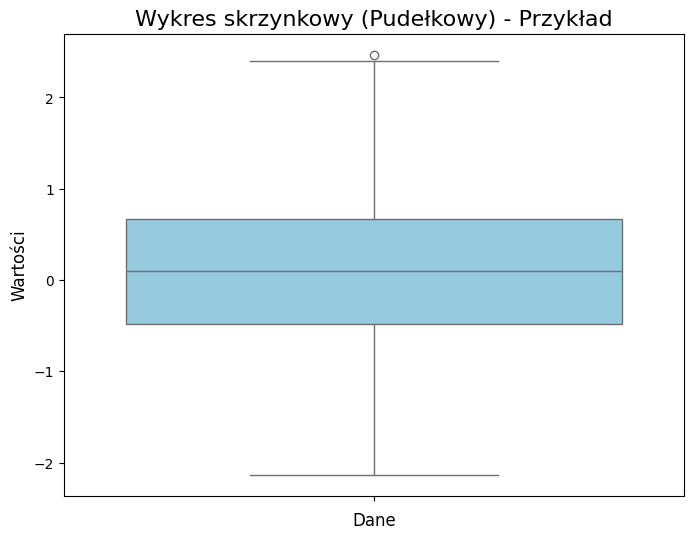

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generowanie przykładowych danych
np.random.seed(10)
data = np.random.normal(loc=0, scale=1, size=100)  # Rozkład normalny

# Tworzenie wykresu skrzynkowego
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, color="skyblue")

# Dodanie tytułu i etykiet
plt.title("Wykres skrzynkowy (Pudełkowy) - Przykład", fontsize=16)
plt.xlabel("Dane", fontsize=12)
plt.ylabel("Wartości", fontsize=12)

# Wyświetlanie wykresu
plt.show()

Elementami wykresu są:

- Pudełko (ang. box): pokazuje rozstęp między pierwszym a trzecim kwartylem (IQR), który obejmuje 50% danych. Mediana (Q2) znajduje się w środku pudełka, pokazując wartość środkową rozkładu.

- Wąsy (ang. whiskers): rozciągają się od pudełka do wartości minimalnej i maksymalnej, o ile te wartości są w ramach dozwolonego zakresu. Zwykle ustala się, że wąsy rozciągają się do wartości, które są w granicach $1,5\times\text{IQR}$ od kwartylu

- Wartości odstające (ang. outliers): dane, które leżą poza zakresami wyznaczonymi przez wąsy. Mogą być one wskazane jako punkty na wykresie.

Zastosowanie wykresu skrzynkowego:
- porównanie rozkładów dla różnych grup danych
- wykrywanie wartości odstających
- podstawowa analiza rozkładu (np. symetryczność, skośność)